
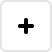
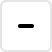
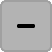
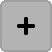
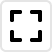
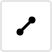
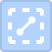
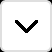
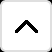
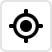
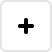
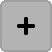
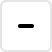
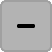
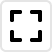
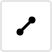
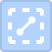
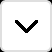
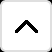
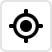

In [1]:
import numpy as np

from lets_plot.mapping import as_discrete
from lets_plot import *

LetsPlot.setup_html()

In [2]:
np.random.seed(1)

n = 6
x = list(range(n))
y1 = np.random.rand(n)
y2 = np.random.rand(n)
v = np.random.choice(list('abc'), size=n)

#### Short form

In [3]:
ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, show_key="Red zone") + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, show_key="Blue zone") + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2, show_key="Green zone") + \
    geom_label(label="Text", x=6, y=0.2, fill='orange', color='white', size=8, show_key="Orange zone")

#### Parameterized form

`layer_key(label, group=None, index=None, **kwargs)`:

- `label` - text in legend
- `group` - the key by which items are combined into a legend group
- `index` - to order items in legend group
- `**kwargs` - aes values to override in the legend

In [4]:
p1 = ggplot() + \
    geom_point(aes('x', 'y'), 
               data={'x': x, 'y': y1}, 
               color='red', shape=21, 
               show_key=layer_key("Red zone")) + \
    geom_line(aes('x', 'y'), 
              data={'x': x, 'y': y2}, 
              color='blue', linetype=2, 
              show_key=layer_key("Blue zone")) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, 
              fill='green', alpha=0.2,
              show_key=layer_key("Green zone", alpha=1)) + \
    geom_label(label="Text", x=6, y=0.2, 
               fill='orange', color='white', size=8, 
               show_key=layer_key("Orange zone", color='black'))

p1

Reorder using `index`:

In [5]:
ggplot() + \
    geom_point(aes('x', 'y'), 
               data={'x': x, 'y': y1}, color='red', shape=21, 
               show_key=layer_key("Red zone", index=1)) + \
    geom_line(aes('x', 'y'), 
              data={'x': x, 'y': y2}, color='blue', linetype=2, 
              show_key=layer_key("Blue zone", index=3)) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, 
              fill='green', alpha=0.2,
              show_key=layer_key("Green zone", alpha=1, index=2)) + \
    geom_label(label="Text", x=6, y=0.2, 
               fill='orange', color='white', size=8, 
               show_key=layer_key("Orange zone", color='black', index=0))

Use `group` to put items to different legend groups:

In [6]:
p2 = ggplot() + \
    geom_point(aes('x', 'y'), 
               data={'x': x, 'y': y1}, 
               color='red', shape=21, 
               show_key=layer_key("Red zone", "Group1")) + \
    geom_line(aes('x', 'y'), 
              data={'x': x, 'y': y2}, 
              color='blue', linetype=2, 
              show_key=layer_key("Blue zone", "Group1")) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, 
              fill='green', alpha=0.2,
              show_key=layer_key("Green zone", "Group2", alpha=1)) + \
    geom_label(label="Text", x=6, y=0.2, 
               fill='orange', color='white', size=8, 
               show_key=layer_key("Orange zone", "Group3", color='black'))

p2

#### Append items to existing legend

In [7]:
# legend 'group' name = default title (variable name)

p3 = ggplot() + \
    geom_point(aes('x', 'y', 
                   color=as_discrete('x'), 
                   size='v'),
               data={'x': x, 'y': y1, 'v': v},
               show_key=layer_key("point", 'x', shape=21)) + \
    geom_line(aes('x', 'y'),
              data={'x': x, 'y': y2},
              linetype=4, color='blue',
              show_key=layer_key("line", 'x'))

p3  

In [8]:
# Change titles for scales - will be combined, but custom legend still has 'x' name

p3 + scale_color_discrete(name="My title") + scale_size(name="My title")

In [9]:
# Change title for 'x'

p3 + scale_color_discrete(name="My title") + scale_size(name="My title") + guides(x=guide_legend("My title"))

#### Title using `guides()`

In [10]:
# default legend group - use key 'manual'

p1 + guides(manual=guide_legend(title="Color zones", nrow=2)) 

In [11]:
# named legend groups

p2 + guides(Group1=guide_legend(title="Zone 1", ncol=2), 
            Group2=guide_legend(title="Zone 2"), 
            Group3=guide_legend(title="Zone 3"))

#### Title using `labs()`

In [12]:
# default legend group in `labs()` - use key 'manual'

p1 + labs(manual="Zones") + guides(manual=guide_legend(ncol=2))

In [13]:
p2 + labs(Group1="Zone 1", Group2="")

Default legend group 'manual' and named group with specified empty title

In [14]:
ggplot() + \
    geom_point(aes('x', 'y'), 
               data={'x': x, 'y': y1}, 
               color='red', shape=21, 
               show_key=layer_key("Red zone")) + \
    geom_line(aes('x', 'y'), 
              data={'x': x, 'y': y2}, 
              color='blue', linetype=2, 
              show_key=layer_key("Blue zone", "Group1")) + \
    guides(Group1=guide_legend(""))